# Часть I: О теореме Байеса

## 1.

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

Прокурор не прав, т.к. оценил вероятность, того, что выбрав человека с редкой кровью, можо считать его виновным и не оценил вероятность того, что редкая кровь может быть у невиновного человека.
<br>
A - подсудимый виновен
<br>
B - редкая группа крови
<br>
Прокурор оценил P(B|не A) = 1%, P(не B| не A) = 99%
<br>
Нужная вероятность P(A|B)

Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

Адвокат оценил вероятность выбора одного человека с редкой группой крови, среди всех людей с редкой группой крови, и то что он при этом будет убийцей.
<br>
Правильнее было бы так
<br>
P(A | B) = P(B | A) * P(A) / P(B)

Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def posterior(a, prob=0.01, test1_pos=0.95, test2_pos=0.95):
    if a == 1:
        return (prob * test1_pos) / (prob * test1_pos + (1 - prob) * (1 - test1_pos))
    return (prob * (1 - test2_pos)) / (prob * (1 - test2_pos) + (1 - prob) * test2_pos)

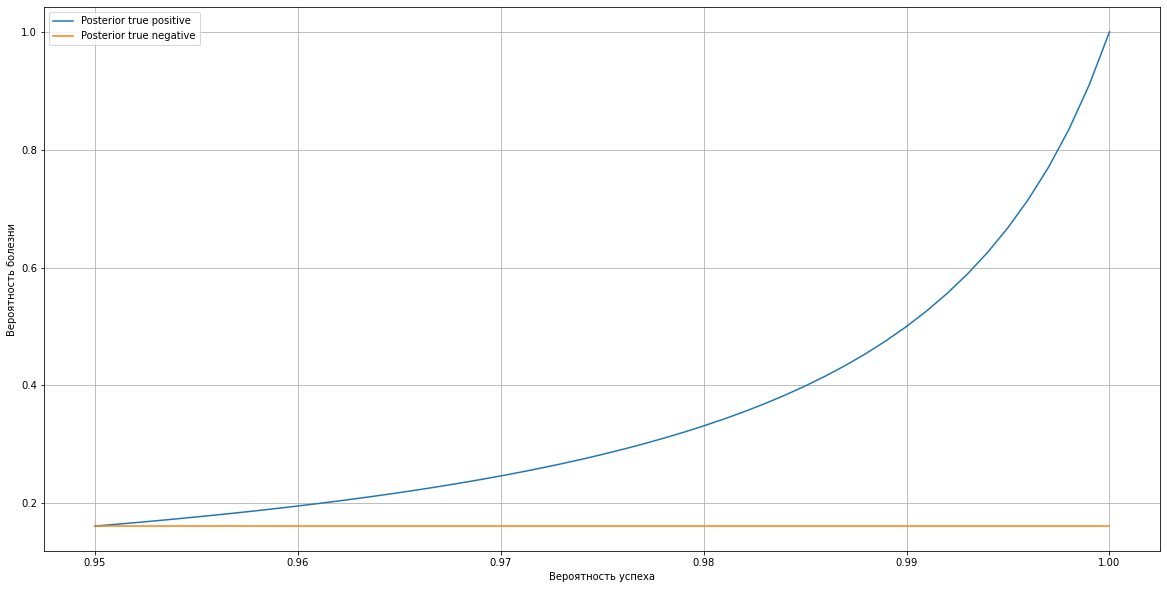

In [27]:
vp = np.vectorize(posterior)
x = np.arange(0.95, 1, 0.001)
y1 = vp(1, test1_pos=x)
y2 = vp(1, test2_pos=x)

figsize = (20,10)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(x, y1, label=r'Posterior true positive')
ax.plot(x, y2, label=r'Posterior true negative')
ax.set_xlabel('Вероятность успеха')
ax.set_ylabel('Вероятность болезни')
plt.legend()
plt.grid()
plt.show()

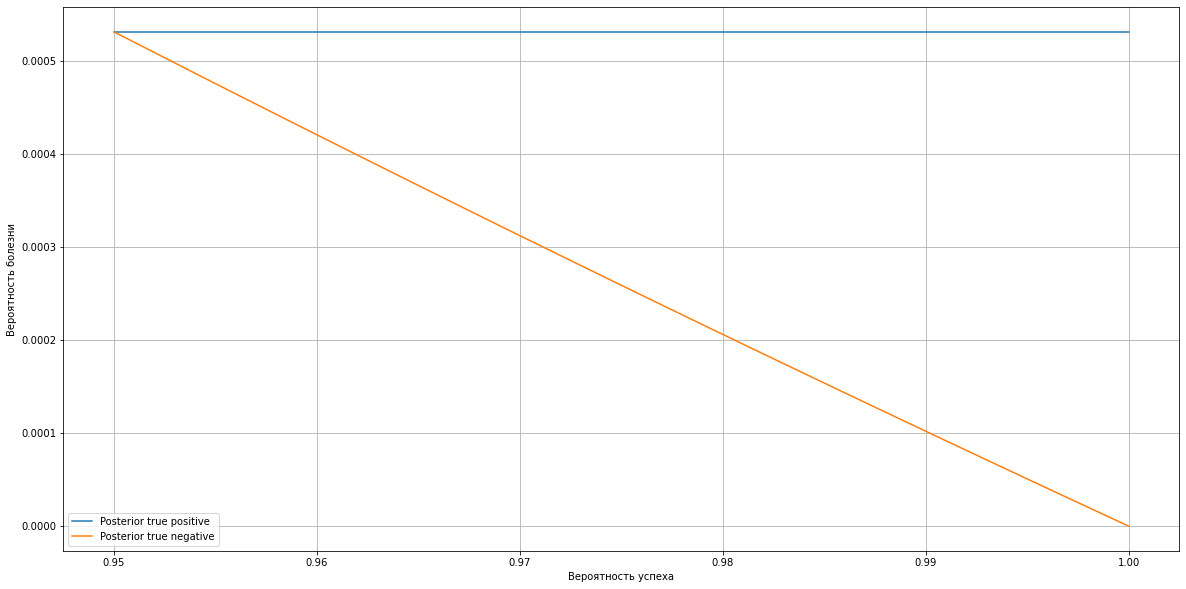

In [26]:
vp = np.vectorize(posterior)
x = np.arange(0.95, 1, 0.001)
y1 = vp(0, test1_pos=x)
y2 = vp(0, test2_pos=x)

figsize = (20,10)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(x, y1, label=r'Posterior true positive')
ax.plot(x, y2, label=r'Posterior true negative')
ax.set_xlabel('Вероятность успеха')
ax.set_ylabel('Вероятность болезни')
plt.legend()
plt.grid()
plt.show()

Необходимо повысить качество определения коронавируса. Если человек не болен, а его будут лечить, то это не смертельно. Хуже наоборот - человек болен, а система его пропустила. Увеличить recall, уменьшить FN.

#  Часть II: О линейной регрессии

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression

## II.1.

In [29]:
df = pd.read_csv('owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [30]:
df_ru = df[df.location == "Russia"]
df_ru.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
52253,RUS,Europe,Russia,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52254,RUS,Europe,Russia,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52255,RUS,Europe,Russia,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52256,RUS,Europe,Russia,2020-02-03,2.0,0.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52257,RUS,Europe,Russia,2020-02-04,2.0,0.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


In [31]:
df_ru.loc[df_ru['new_cases'] <= 0.0, 'new_cases'] = 1.
df_ru.head()

C:\Users\Sergey\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
52253,RUS,Europe,Russia,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52254,RUS,Europe,Russia,2020-02-01,2.0,1.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52255,RUS,Europe,Russia,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52256,RUS,Europe,Russia,2020-02-03,2.0,1.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52257,RUS,Europe,Russia,2020-02-04,2.0,1.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


In [32]:
df_ru.shape

(389, 59)

In [63]:
X_train = df_ru.loc[df_ru['date'] >= '2020-03-03'][:50]
y_train_total = df_ru.loc[df_ru['date'] >= '2020-03-03', 'total_cases'][:50]
y_train_new = df_ru.loc[df_ru['date'] >= '2020-03-03', 'new_cases'][:50]
X_train.drop(['total_cases', 'new_cases'], axis=1, inplace=True)
X_test = df_ru.loc[df_ru['date'] >= '2020-03-03'][50:]
y_test_total = df_ru.loc[df_ru['date'] >= '2020-03-03', 'total_cases'][50:]
y_test_new = df_ru.loc[df_ru['date'] >= '2020-03-03', 'new_cases'][50:]
X_test.drop(['total_cases', 'new_cases'], axis=1, inplace=True)

In [35]:
X_train.head()

,iso_code,continent,location,date,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
52285,RUS,Europe,Russia,2020-03-03,0.143,NaN,NaN,0.0,0.021,0.000,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52286,RUS,Europe,Russia,2020-03-04,0.143,NaN,NaN,0.0,0.021,0.000,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52287,RUS,Europe,Russia,2020-03-05,0.286,NaN,NaN,0.0,0.027,0.007,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52288,RUS,Europe,Russia,2020-03-06,1.571,NaN,NaN,0.0,0.089,0.062,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52289,RUS,Europe,Russia,2020-03-07,1.571,NaN,NaN,0.0,0.089,0.000,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


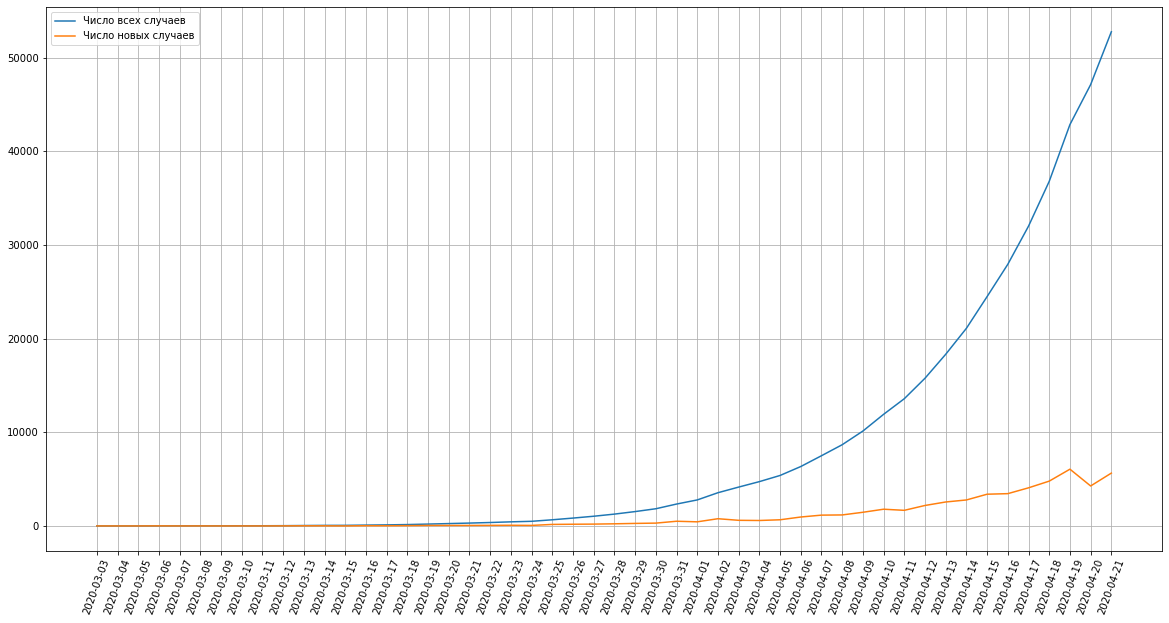

In [51]:
figsize = (20,10)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(X_train['date'], y_train_total, label=r'Число всех случаев')
ax.plot(X_train['date'], y_train_new, label=r'Число новых случаев')
plt.xticks(rotation=70)
plt.legend()
plt.grid()
plt.show()

### II.2.a.

Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

In [261]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model
from scipy.stats import multivariate_normal
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import statsmodels.api as sm

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

from matplotlib import rc
rc('font',**{'family':'sans-serif'})
rc('figure', **{'dpi': 300})

C:\Users\Sergey\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [52]:
from sklearn.linear_model import LinearRegression

In [65]:
X_train.shape, y_train_total.shape

((50, 57), (50,))

In [85]:
y_train_total_log = np.log(y_train_total)
days = np.linspace(1,50,50).reshape(-1, 1)
reg = LinearRegression().fit(days, y_train_total_log.values)  
y_pred = reg.predict(days)

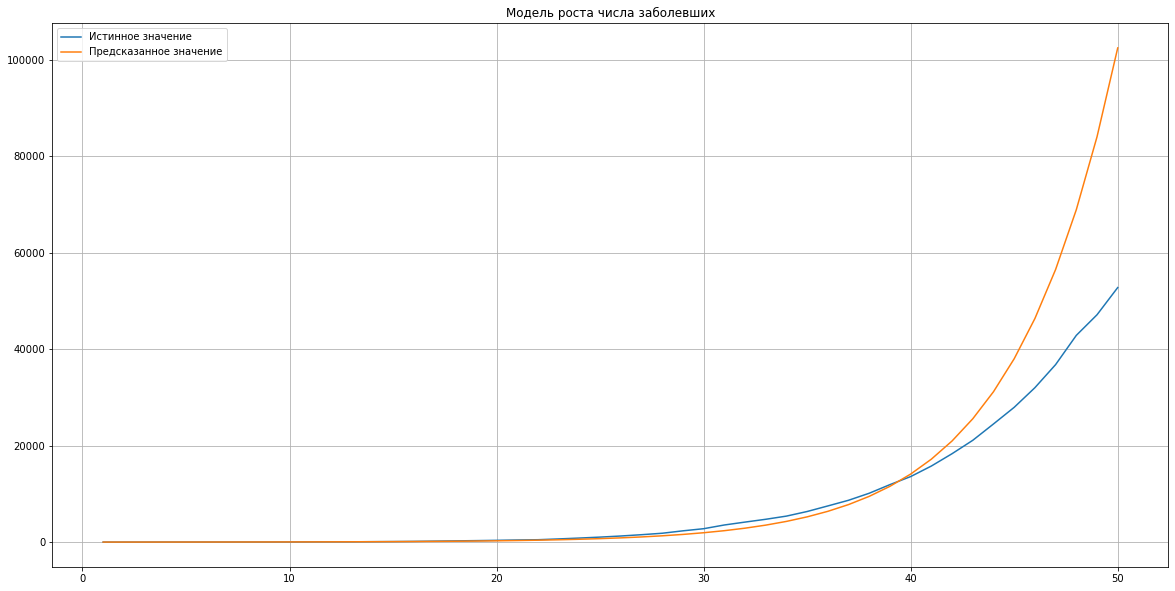

In [97]:
figsize = (20,10)
fig = plt.figure(figsize=figsize)
plt.plot(days, y_train_total, label=r'Истинное значение')
plt.plot(days.reshape(-1, 1), np.exp(y_pred), label=r'Предсказанное значение') 
plt.title(r'Модель роста числа заболевших')
plt.legend()
plt.grid()

### II.2.b.

Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

In [266]:
w_1, w_0 = reg.coef_[0], reg.intercept_
w_1, w_0

(0.19829091233588558, 1.6224462364488117)

In [155]:
sigma_noise = np.std(y_train_total_log.values - y_pred, dtype='float64')
sigma_noise

0.34904220596356594

In [249]:
cur_mu, cur_sigma = np.array([0., 0.], dtype='float64'), np.array([[1., 0.], [0., 1.]], dtype='float64')
x = np.array(days, dtype='float64').flatten()
y = np.array(y_train_total_log.values, dtype='float64')

In [262]:
def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.vstack((x, 50*[1])).T
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + 
                    (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), y) ) 
    return mu_n, sigma_n

In [259]:
mu, sigma = bayesian_update(cur_mu, cur_sigma, x, y, sigma_noise)
mu, sigma

(array([0.19876786, 1.60636988]),
 array([[ 1.16121360e-05, -2.95389720e-04],
        [-2.95389720e-04,  9.94481545e-03]]))

### II.2.c.

In [293]:
def myplot_sample_lines(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем экспоненты
    my_w = np.random.multivariate_normal(mu, sigma, n)

    # plt.axis('equal')
    for w in my_w:
        plt.plot(xs, np.exp(w[0]*xs + w[1]), 'k-', lw=.4)
    plt.ylim((0, 10**4))
    plt.xlim((0, 80))
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)

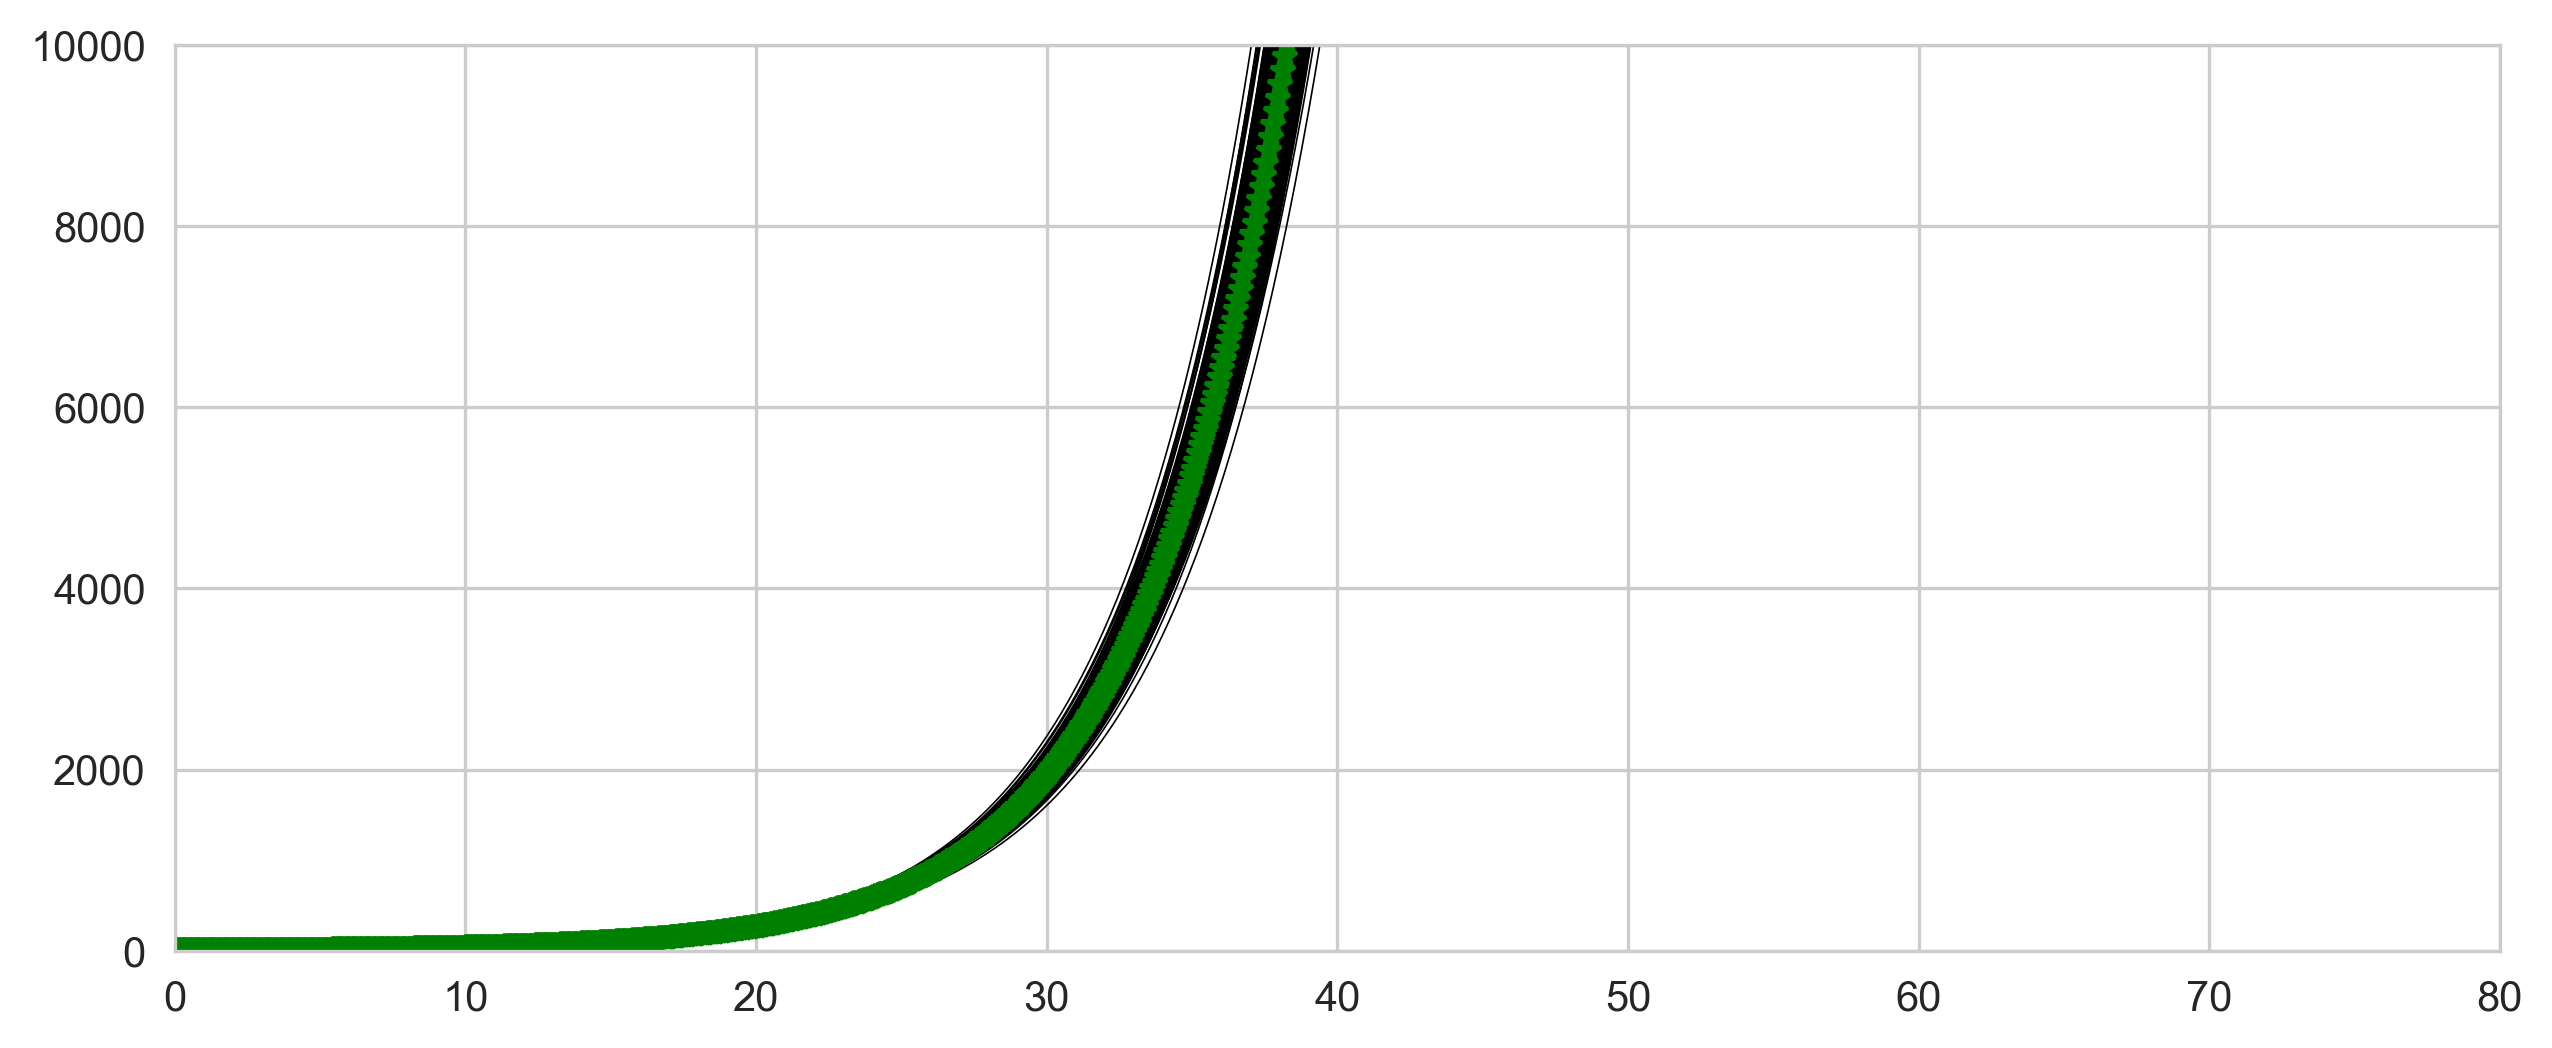

In [294]:
xs = np.linspace(0, 80, 1000)
fig = plt.figure(figsize=(10, 4))
myplot_sample_lines(mu, sigma, n=1000)
plt.plot(xs, np.exp(w_1*xs + w_0), color='green', marker="*")

In [303]:
import datetime
may1 = (datetime.date(2020,5,1) - datetime.date(2020,3,3)).days
jun1 = (datetime.date(2020,6,1) - datetime.date(2020,3,3)).days 
sep1 = (datetime.date(2020,9,1) - datetime.date(2020,3,3)).days 

In [304]:
print("Число заболевших к 1 мая {}".format(np.exp(w_1*may_1 + w_0)))
print("Число заболевших к 1 июня {}".format(np.exp(w_1*jun_1 + w_0)))
print("Число заболевших к 1 сентября {}".format(np.exp(w_1*sep_1 + w_0)))

Число заболевших к 1 мая 610241.5029447803
Число заболевших к 1 июня 285179209.7274659
Число заболевших к 1 сентября 2.386984356413661e+16


### II.3

Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

Для обучения будем использовать полином второй степени: w_2 * x^2 + w_1 * x + w_0

In [323]:
y_train_new_log = np.log(y_train_new)
days1 = np.linspace(1,50,50).reshape(-1, 1).flatten()
days2 = days1 ** 2
X = np.vstack((days2, days1, 50*[1])).T
reg = LinearRegression().fit(X, y_train_new_log.values)  
y_pred = reg.predict(X)

In [324]:
reg.coef_

array([-0.00182979,  0.27928241,  0.        ])

In [335]:
reg.intercept_

-0.6740430253610787

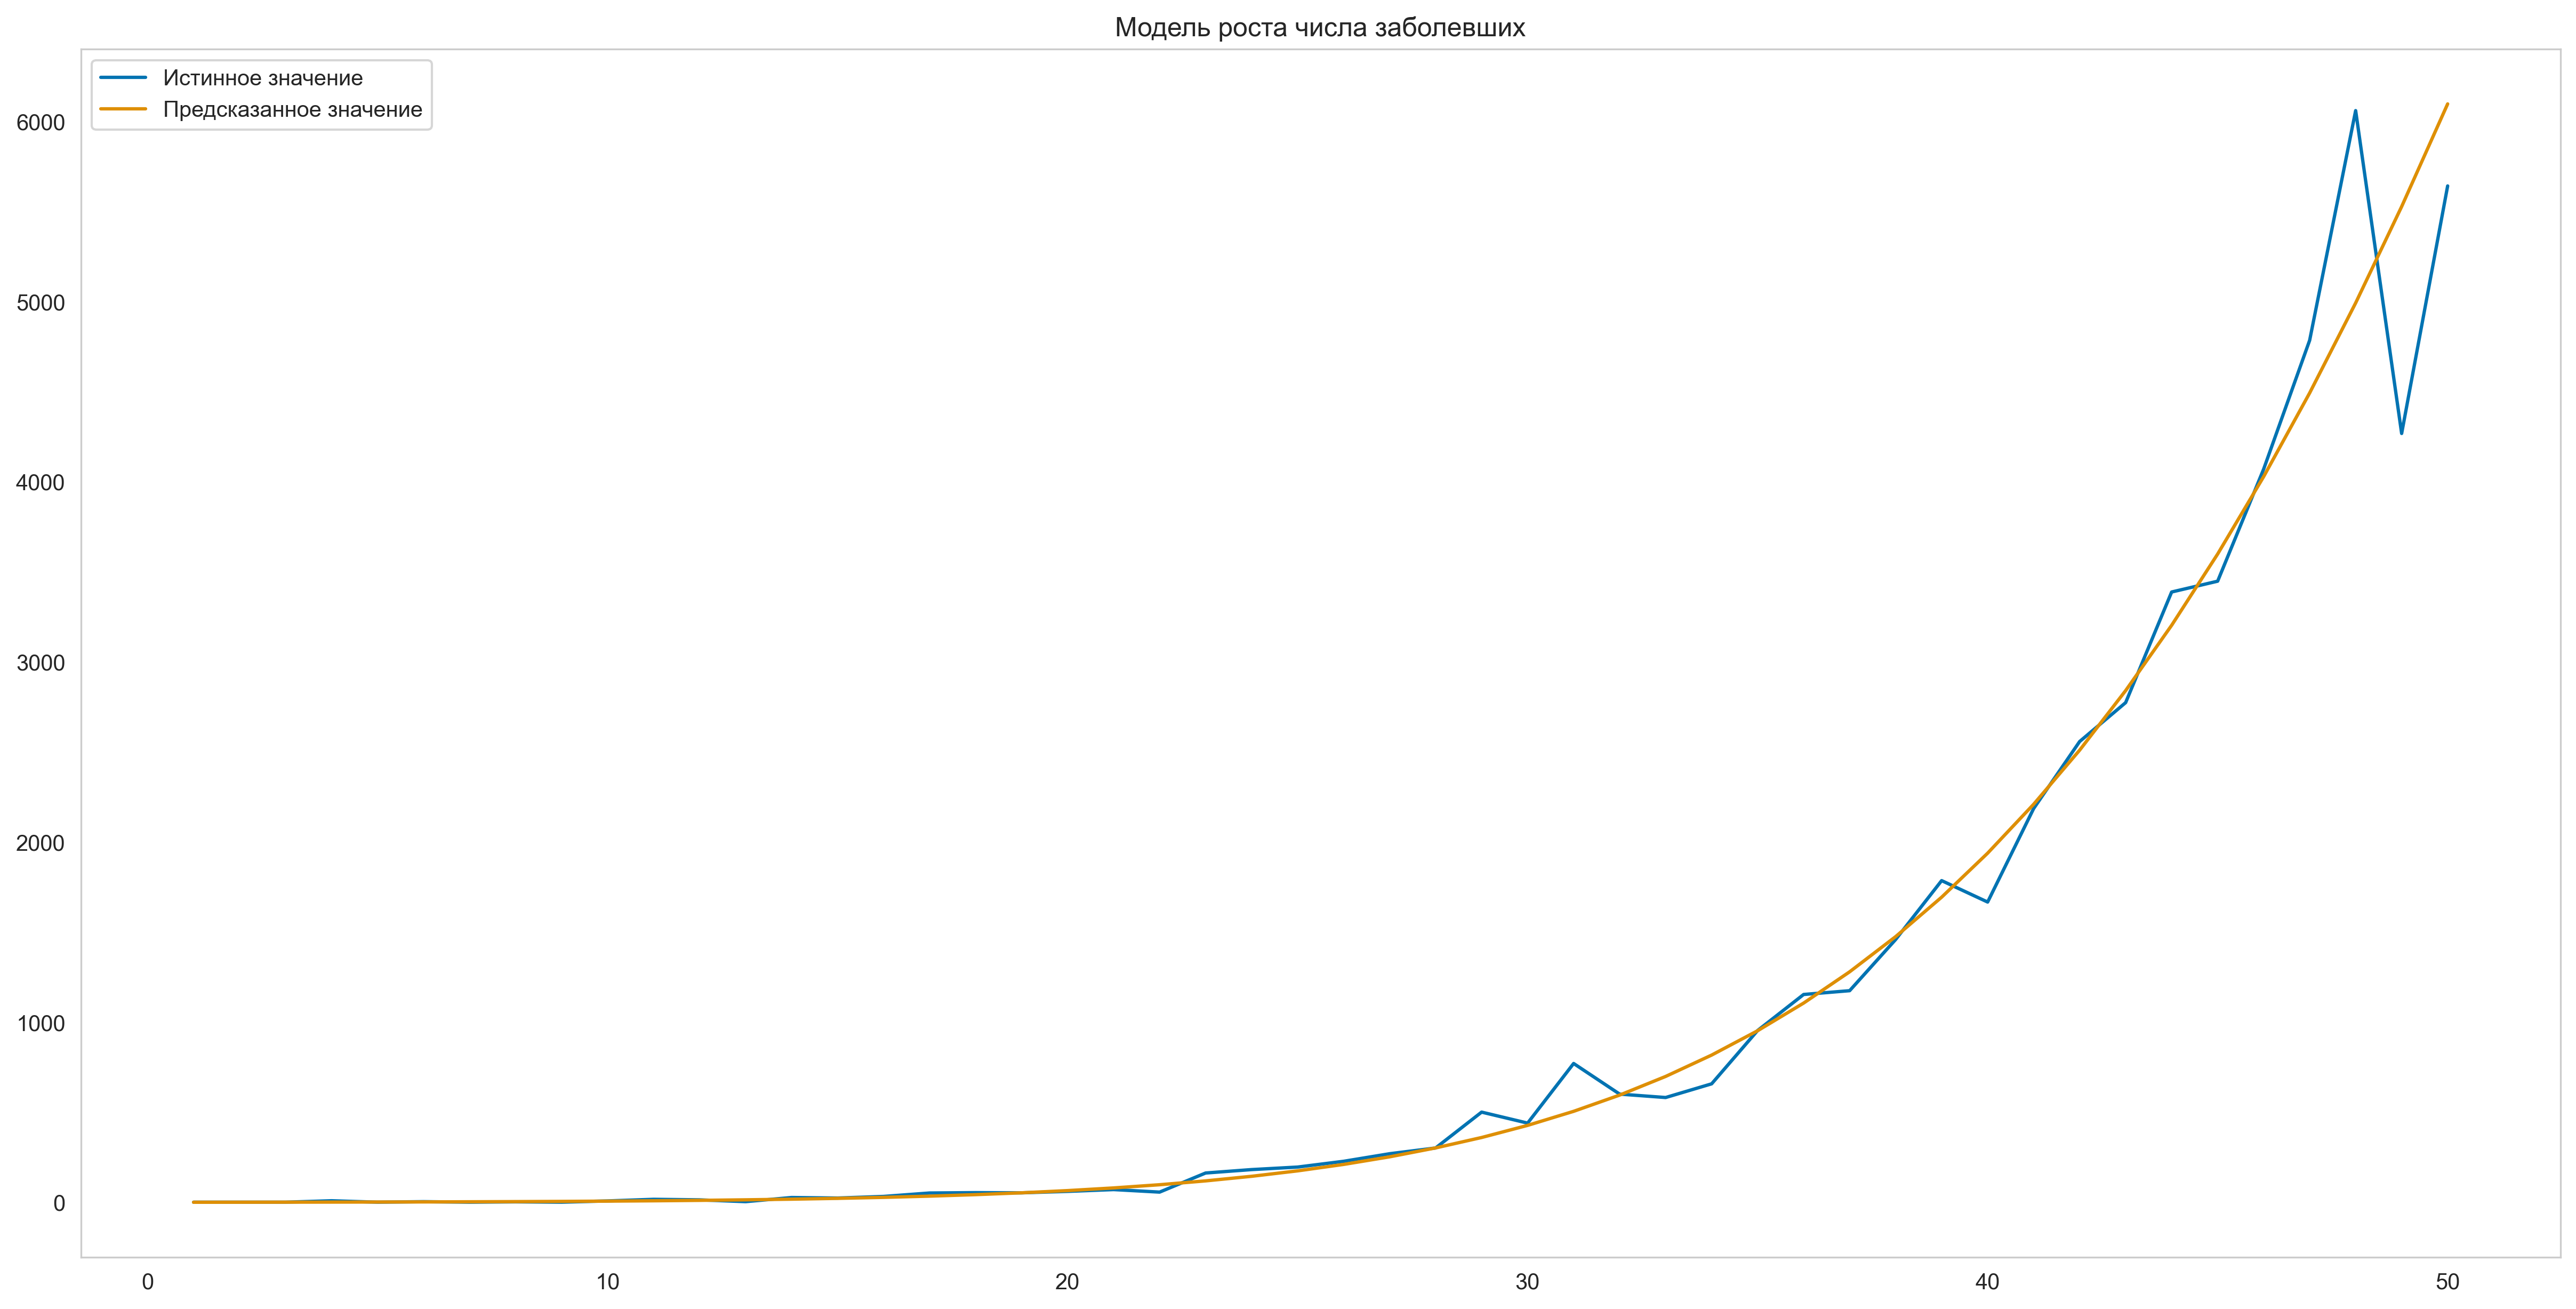

In [326]:
figsize = (20,10)
fig = plt.figure(figsize=figsize)
plt.plot(days, y_train_new, label=r'Истинное значение')
plt.plot(days.reshape(-1, 1), np.exp(y_pred), label=r'Предсказанное значение') 
plt.title(r'Модель роста числа заболевших')
plt.legend()
plt.grid()

In [393]:
w_2, w_1, w_0 = reg.coef_[0], reg.coef_[1], reg.coef_[2]

In [327]:
sigma_noise = np.std(y_train_new_log.values - y_pred, dtype='float64')
sigma_noise

0.4891695424595195

In [328]:
cur_mu, cur_sigma = np.array([0., 0., 0.], dtype='float64'), np.array([[1., 0., 0.], 
                                                                       [0., 1., 0.],
                                                                       [0., 0., 1.]], dtype='float64')
x = np.array(days, dtype='float64').flatten()
y = np.array(y_train_new_log.values, dtype='float64')

In [332]:
def bayesian_update(mu, sigma, x_matrix, y, sigma_noise=.25):
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + 
                    (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), y) ) 
    return mu_n, sigma_n

In [333]:
mu, sigma = bayesian_update(cur_mu, cur_sigma, X, y, sigma_noise)
mu, sigma

(array([-0.00178859,  0.27679809, -0.6429853 ]),
 array([[ 1.34498814e-07, -6.82512164e-06,  5.82943886e-05],
        [-6.82512164e-06,  3.68983203e-04, -3.53279772e-03],
        [ 5.82943886e-05, -3.53279772e-03,  4.46128406e-02]]))

In [385]:
# Посэмплируем прямые и выдадим статистики по предсказаниям
def sample_statistics(mu, sigma, xs, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        res[i,:] = np.cumsum(np.exp(w[0]*xs*xs + w[1]*xs + w[2]))
    return res

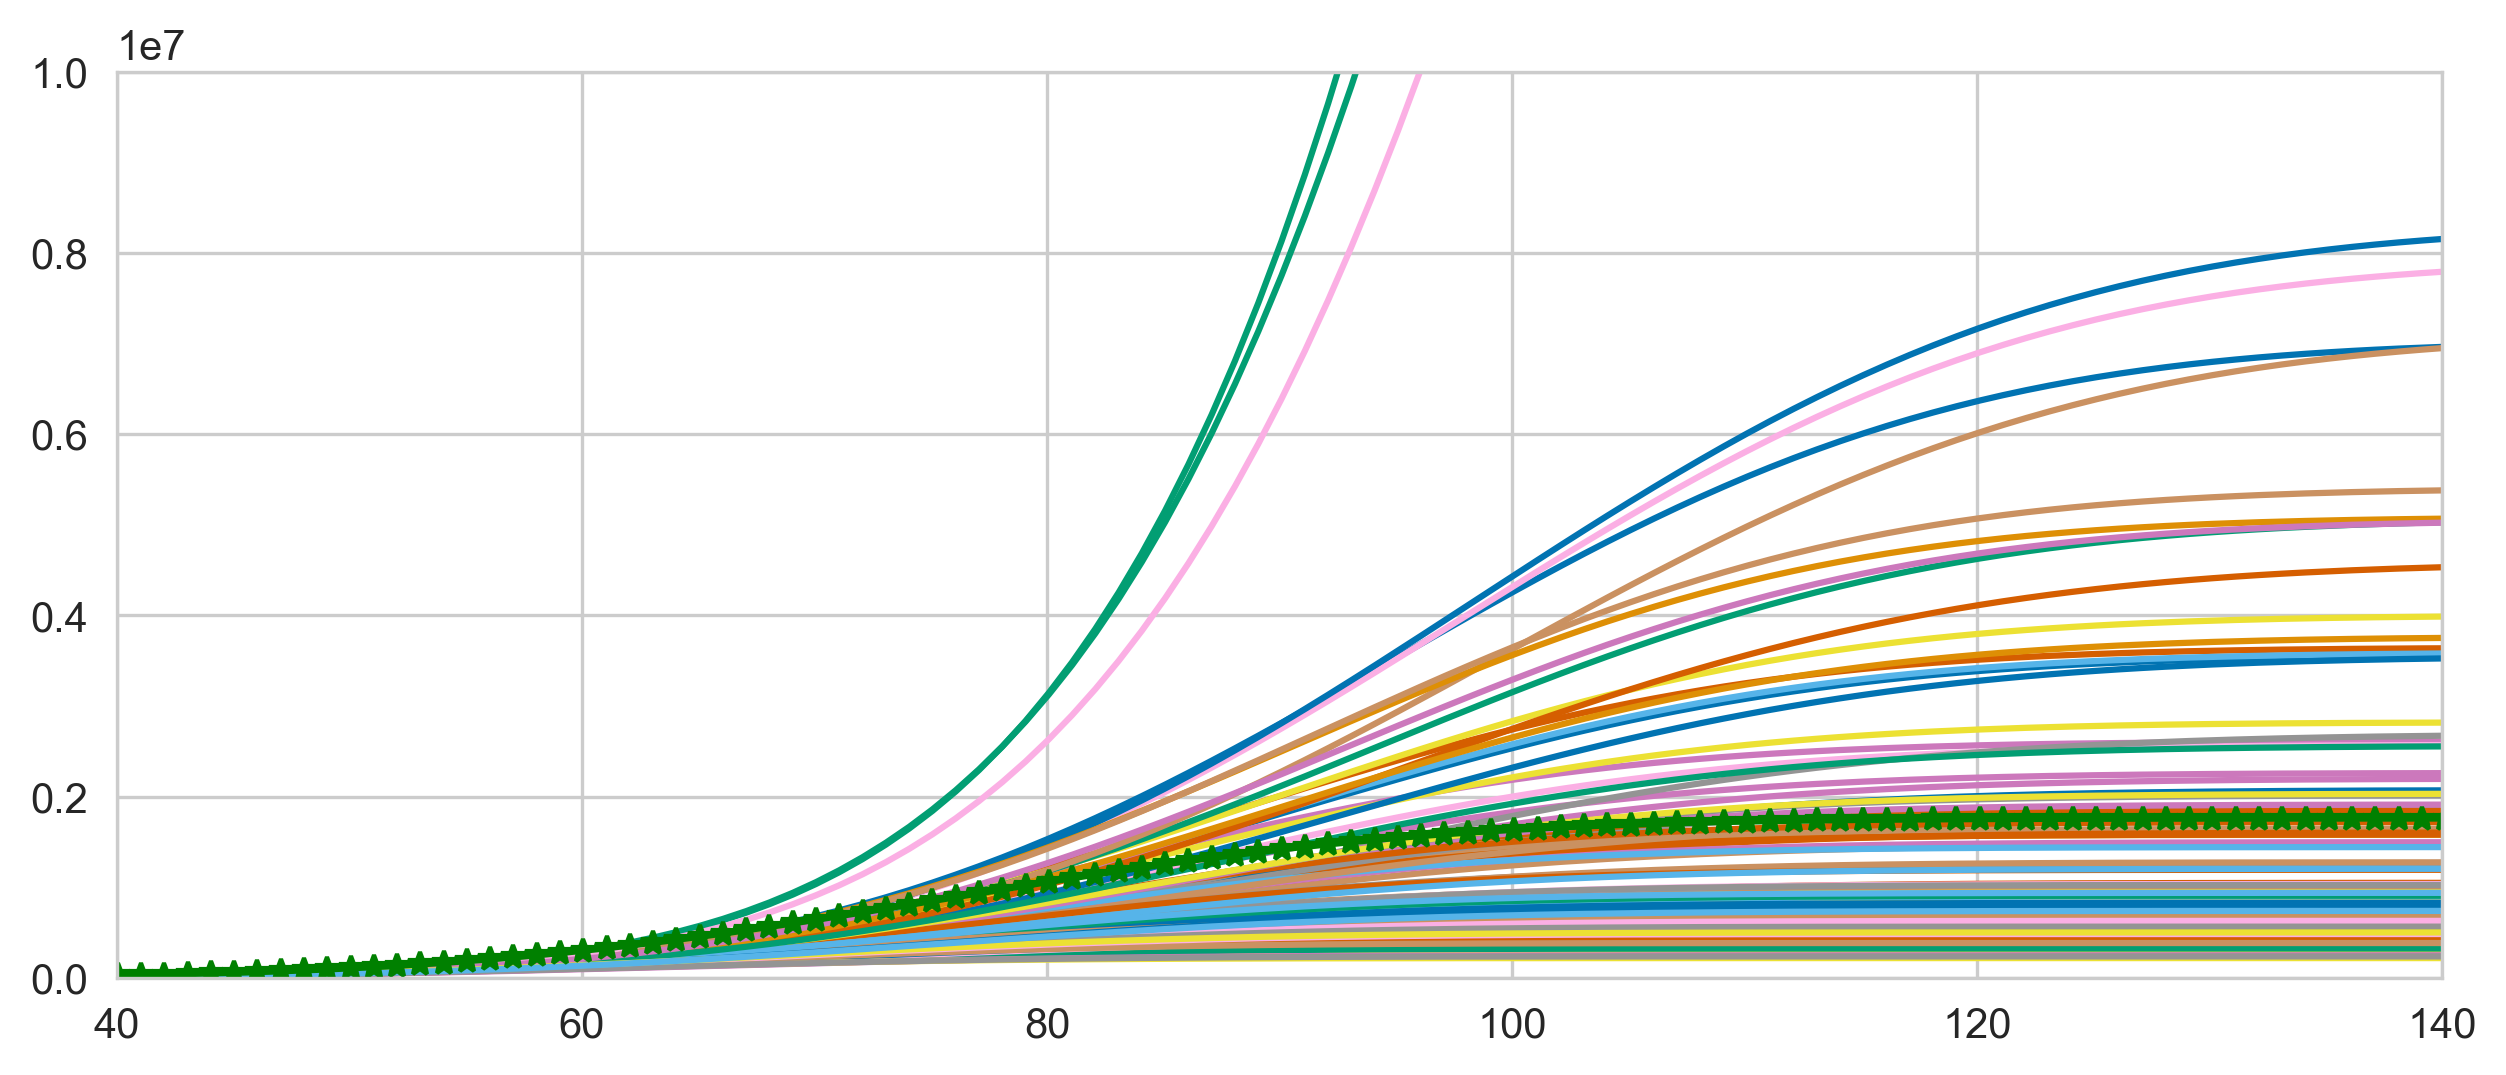

In [401]:
fig = plt.figure(figsize=(10, 4))
plt.ylim((0, 10**7))
plt.xlim((40, 140))
xs = np.linspace(0, 1000, 1000)
x = sample_statistics(mu, sigma, xs, n=100)
for p in x:
    plt.plot(xs, p)
plt.plot(xs, np.cumsum(np.exp(w_2*xs*xs + w_1*xs + w_0)), color='green', marker="*")